<a href="https://colab.research.google.com/github/AuliaVirza101/PCVK/blob/main/Week7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Import Library

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im


Text(0.5, 1.0, '21 21 gaussian blur')

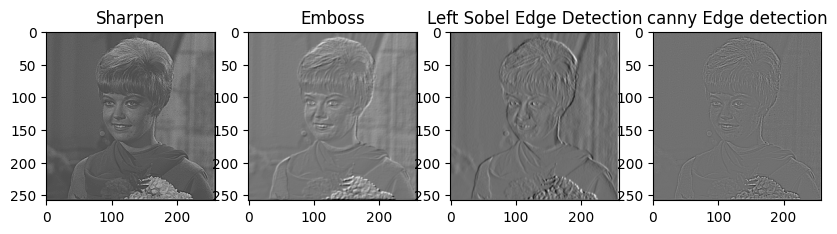

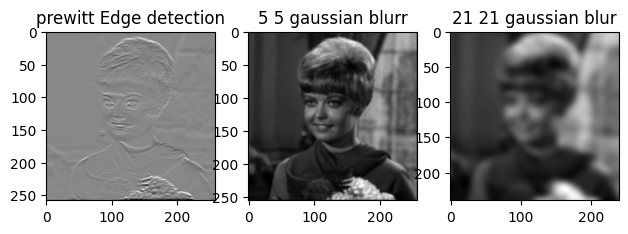

In [26]:
def convolution2d(image, kernel, stride, padding):
  # Dapatkan dimensi gambar dan kernel
  image_height, image_width = image.shape
  kernel_height, kernel_width = kernel.shape

  # Hitung dimensi gambar output
  output_height = int(((image_height - kernel_height + 2 * padding) / stride) + 1)
  output_width = int(((image_width - kernel_width + 2 * padding) / stride) + 1)

  # Buat gambar output yang diinisialisasi dengan nol
  output_image = np.zeros((output_height, output_width))

  # Lakukan padding pada gambar input jika diperlukan
  if padding > 0:
    padded_image = np.pad(image, padding, mode='constant')
  else:
    padded_image = image

  # Lakukan konvolusi
  for i in range(output_height):
    for j in range(output_width):
      # Dapatkan wilayah gambar input saat ini untuk konvolusi
      current_region = padded_image[i * stride:i * stride + kernel_height, j * stride:j * stride + kernel_width]

      # Lakukan perkalian elemen-bijaksana antara wilayah saat ini dan kernel
      # lalu jumlahkan hasilnya
      output_image[i, j] = np.sum(current_region * kernel)

  # Kembalikan gambar output
  return output_image

img = cv.imread('drive/MyDrive/PCVK_2024/female.tiff')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

#image Sharpen
kernel_sharpen = np.array([[0, -1, 0],
                          [-1, 5, -1],
                          [0, -1, 0]])

img_sharpen = convolution2d(img_gray,kernel_sharpen,1,2)

#image Emboss
kernel_emboss = np.array([[-2, -1, 0],
                          [-1, 1, 1],
                          [0, 1, 2]])

img_emboss = convolution2d(img_gray,kernel_emboss,1,2)

#image Left Sobel Edge detection
kernel_sobel = np.array([[1, 0, -1],
                          [2, 0, -2],
                          [1, 0, -1]])

img_sobel = convolution2d(img_gray,kernel_sobel,1,2)

#image Canny Edge detection
kernel_canny = np.array([[-1, -1, -1],
                          [-1, 8, -1],
                          [-1, -1, -1]])

img_canny = convolution2d(img_gray,kernel_canny,1,2)

#image Prewitt Edge detection
kernel_prewitt = np.array([[-1, -1, -1],
                          [0, 0, 0],
                          [1, 1, 1]])

img_prewitt = convolution2d(img_gray,kernel_prewitt,1,2)

#image 5 5 gaussian blurr
kernel_55gaussian = 1/256 * (np.array([[1, 4, 6, 4, 1],
                             [4, 16, 24, 16, 4],
                             [6, 24, 36, 24, 6],
                             [4, 16, 24, 16, 4],
                             [1, 4, 6, 4, 1]]))

img_55gaussian = convolution2d(img_gray,kernel_55gaussian,1,2)

#image 21 21 gaussian blur
kernel_size = 21
sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
gauss_kernel = gaussian_kernel @ gaussian_kernel.transpose()

img_2121gaussian = convolution2d(img_gray,gauss_kernel,1,2)
plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_sharpen,cmap='gray')
plt.title('Sharpen')

plt.subplot(1, 4, 2)
plt.imshow(img_emboss,cmap='gray')
plt.title('Emboss')

plt.subplot(1, 4, 3)
plt.imshow(img_sobel,cmap='gray')
plt.title('Left Sobel Edge Detection')

plt.subplot(1, 4, 4)
plt.imshow(img_canny,cmap='gray')
plt.title('canny Edge detection')

plt.figure(figsize=(10, 5))

plt.subplot(1, 4, 1)
plt.imshow(img_prewitt,cmap='gray')
plt.title('prewitt Edge detection')

plt.subplot(1, 4, 2)
plt.imshow(img_55gaussian,cmap='gray')
plt.title('5 5 gaussian blurr')

plt.subplot(1, 4, 3)
plt.imshow(img_2121gaussian,cmap='gray')
plt.title('21 21 gaussian blur')





Apa itu Konvolusi?

Konvolusi seperti "menyaring" foto menggunakan "kaca pembesar" kecil yang disebut kernel. Kernel ini berisi angka-angka khusus.

Cara Kerjanya:

Kernel digeserkan di atas foto, pixel demi pixel.
Di setiap posisi, angka-angka di kernel dikalikan dengan angka-angka pixel foto yang berada di bawahnya.
Hasil perkalian tersebut dijumlahkan.
Jumlah tersebut menjadi nilai pixel baru di foto hasil konvolusi.
Analogi:

Bayangkan kamu punya senter dengan bentuk tertentu (kernel) dan kamu menyinari foto dengan senter tersebut. Cahaya senter akan menyoroti bagian-bagian tertentu foto, dan hasilnya akan membentuk foto baru.

image: Foto input yang akan diproses.
kernel: Senter atau filter yang berisi angka-angka khusus.
stride: Seberapa jauh senter digeser setiap kali. Angka yang lebih besar berarti senter bergerak lebih cepat.
padding: Menambahkan "bingkai" di sekeliling foto agar kernel bisa memproses tepi foto dengan baik.

Intinya:

Konvolusi adalah cara untuk mengubah foto dengan "menyaringnya" menggunakan kernel. Kernel yang berbeda akan menghasilkan efek yang berbeda pada foto.